In [1]:
import pandas as pd                   # for data manipulation
import seaborn as sns                 # for data visualisation
import matplotlib.pyplot as plt       # for data visualisation
from sklearn.model_selection import train_test_split           # for splitting the dataset
from sklearn.preprocessing import StandardScaler               # for scaling the dataset
from sklearn.metrics import r2_score                           # accuracy measure for the model
from sklearn.linear_model import LinearRegression              # Linear Regression model
from sklearn.metrics import mean_squared_error                 # accuracy measure for the model
import numpy as np                                             # for mathematical operations 
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("Clean_Data.csv")

# displaying the dataframe
df.head()

,Is Captain(1=yes),Is Wktkeeper(1=Yes),Nationality(1=Overseas),Name,Team,IPL 4 Franchise,Player cost USD,matches,innings played,no,...,half_centuries_ipl,fours_ipl,sixes_ipl,matches_bowl_ipl,balls_bowled_ipl,total_runs_given_ipl,wickets_taken_ipl,bowling_avg_ipl,economy_ipl,3wickets_ipl
0,0.0,0.0,1,Aiden Blizzard,Australia,Mumbai Indians,20000.0,40.0,40.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1,Jonathan Vandiar,South Africa,Royal Challengers Bangalore,20000.0,18.0,18.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1,Nathan Rimmington,Australia,Kings XI Punjab,20000.0,23.0,8.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1,Rilee Rossouw,South Africa,Royal Challengers Bangalore,20000.0,20.0,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1,Robert Frylinck,South Africa,Delhi Daredevils,20000.0,25.0,22.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df=df.drop('Name',axis=1)

In [4]:
data = pd.get_dummies(df, columns=['Team', 'IPL 4 Franchise'])
data.shape

(129, 68)

In [5]:
X = data.drop('Player cost USD', axis=1)
y = data['Player cost USD']

In [6]:
cols = X.columns

In [7]:
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(np.array(y).reshape(-1, 1))


In [8]:
X[0]

array([-0.28988552, -0.36273813,  0.76980036, -0.89519161, -0.30074073,
       -1.06482497, -0.21017582,  0.74098358, -0.44095855,  0.67040152,
        0.11282486, -0.34955847,  1.36968313, -0.40440899, -0.52591768,
        0.26577671, -0.23293425,  0.22862799, -0.54750376, -0.28886651,
       -1.23669388, -1.06446459, -1.0789597 , -0.38959686, -1.04260135,
       -1.32784239,  1.23900783, -1.39599675, -0.6168809 , -0.35899621,
       -0.32025631, -0.90598888, -0.67015143, -0.69907095, -0.94231549,
       -0.83509319, -1.21683887, -0.17888544, -0.49834449, -0.59794914,
       -0.55250839, -0.71577535, -0.67154963, -0.68706792, -0.63404306,
       -0.89076438, -0.89699756, -0.46581234,  1.70560573, -0.08838835,
       -0.23953507, -0.76980036, -0.08838835, -0.23953507, -0.42835294,
       -0.27386128, -0.15430335, -0.40269363, -0.33476703, -0.37628835,
       -0.30532006, -0.34891135, -0.30532006,  3.122499  , -0.33476703,
       -0.23953507, -0.34891135])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
print(y_test.shape)

(39, 1)


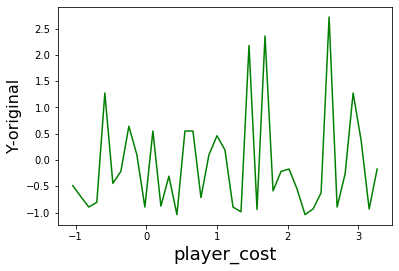

In [54]:
x = np.linspace(-1.04087012, 3.266556, 39)
y1 = np.asarray(y_test)
#y2=np.asarray(y_test1)
plt.plot(x, y1,'g')
#plt.plot(x,y2,'g')
plt.xlabel('player_cost', fontsize=18)
plt.ylabel('Y-original', fontsize=16)
plt.show()

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)
mean_squared_error(y_test, y_pred_lr)
r2_score(y_test, y_pred_lr)

-0.3623976020804758

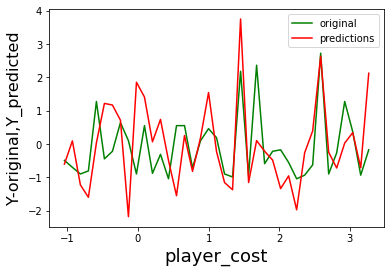

In [35]:
x = np.linspace(-1.04087012, 3.266556, 39)
y1 = np.asarray(y_test)
y2=np.asarray(y_pred_lr)
plt.plot(x, y1,'g')
plt.plot(x,y2,'r')
plt.legend(['original','predictions'])
plt.xlabel('player_cost', fontsize=18)
plt.ylabel('Y-original,Y_predicted', fontsize=16)
plt.show()

In [36]:
y_pred_bl = np.repeat(np.mean(y_train), len(y_test))

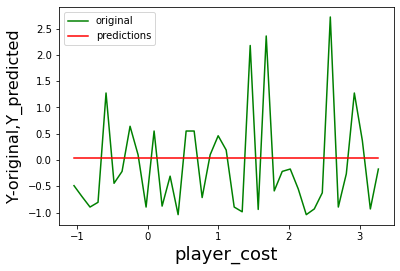

In [37]:
x = np.linspace(-1.04087012, 3.266556, 39)
y1 = np.asarray(y_test)
y2=np.asarray(y_pred_bl)
plt.plot(x, y1,'g')
plt.plot(x,y2,'r')
plt.legend(['original','predictions'])
plt.xlabel('player_cost', fontsize=18)
plt.ylabel('Y-original,Y_predicted', fontsize=16)
plt.show()

In [38]:

# define the method
rfe = RFE(estimator=LinearRegression(), n_features_to_select=15)

# fit the data
rfe.fit(X_train, y_train)

C:\Users\pg21p\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [39]:
for i in range(X.shape[1]):
    print('Column: %s, Selected %s, Rank: %.3f' % (cols[i], rfe.support_[i], rfe.ranking_[i]))

Column: Is Captain(1=yes), Selected True, Rank: 1.000
Column: Is Wktkeeper(1=Yes), Selected False, Rank: 6.000
Column: Nationality(1=Overseas), Selected False, Rank: 17.000
Column: matches, Selected False, Rank: 11.000
Column: innings played, Selected True, Rank: 1.000
Column: no, Selected False, Rank: 20.000
Column: runs scored, Selected True, Rank: 1.000
Column: highest score, Selected False, Rank: 34.000
Column: Is star batsman, Selected False, Rank: 18.000
Column: Is batsman, Selected False, Rank: 45.000
Column: Batting avg, Selected False, Rank: 31.000
Column: Balls faced, Selected False, Rank: 4.000
Column: Strike rate, Selected False, Rank: 36.000
Column: 100 runs made, Selected False, Rank: 35.000
Column: 50 runs made, Selected False, Rank: 47.000
Column: 4s, Selected True, Rank: 1.000
Column: 6s, Selected True, Rank: 1.000
Column: Catches per match, Selected False, Rank: 41.000
Column: Catches taken, Selected False, Rank: 40.000
Column: stumping made, Selected False, Rank: 5.0

In [40]:
variables = []
for i in range(len(cols)):
    if rfe.support_[i] == True:
        variables.append(cols[i])

In [41]:
X1 = data[variables]
y1 = data['Player cost USD']

In [42]:
X1 = StandardScaler().fit_transform(X1)
y1 = StandardScaler().fit_transform(np.array(y1).reshape(-1, 1))

In [43]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [44]:
model1 = LinearRegression()

In [45]:
model1.fit(X_train1, y_train1)
y_pred_lr1 = model1.predict(X_test1)

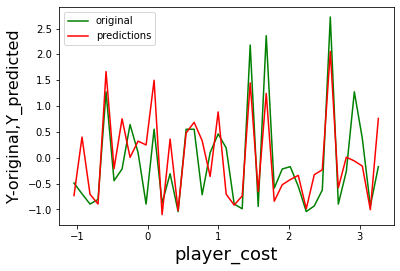

In [46]:
x = np.linspace(-1.04087012, 3.266556, 39)
y1 = np.asarray(y_test)
y2=np.asarray(y_pred_lr1)
plt.plot(x, y1,'g')
plt.plot(x,y2,'r')
plt.legend(['original','predictions'])
plt.xlabel('player_cost', fontsize=18)
plt.ylabel('Y-original,Y_predicted', fontsize=16)
plt.show()

In [47]:
model = RandomForestRegressor()
# fit the model
model.fit(X_train, y_train.reshape(-1))
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (cols[i],v))

Feature: Is Captain(1=yes), Score: 0.04929
Feature: Is Wktkeeper(1=Yes), Score: 0.00013
Feature: Nationality(1=Overseas), Score: 0.01210
Feature: matches, Score: 0.01916
Feature: innings played, Score: 0.01369
Feature: no, Score: 0.02760
Feature: runs scored, Score: 0.01045
Feature: highest score, Score: 0.01508
Feature: Is star batsman, Score: 0.00090
Feature: Is batsman, Score: 0.00003
Feature: Batting avg, Score: 0.02152
Feature: Balls faced, Score: 0.00538
Feature: Strike rate, Score: 0.02264
Feature: 100 runs made, Score: 0.00145
Feature: 50 runs made, Score: 0.01794
Feature: 4s, Score: 0.02086
Feature: 6s, Score: 0.00785
Feature: Catches per match, Score: 0.01929
Feature: Catches taken, Score: 0.04482
Feature: stumping made, Score: 0.00381
Feature: Is bowler?, Score: 0.00023
Feature: Number of balls bowled, Score: 0.00514
Feature: runs given, Score: 0.00311
Feature: Is star bowler, Score: 0.00056
Feature: wkts taken, Score: 0.00438
Feature: Bowling average, Score: 0.01578
Feature

In [48]:
variables = []
for i in range(len(cols)):
    if importance[i] >= 0.02:
        variables.append(cols[i])

In [49]:
X1 = data[variables]
y1 = data['Player cost USD']

In [50]:
X1 = StandardScaler().fit_transform(X1)
y1 = StandardScaler().fit_transform(np.array(y1).reshape(-1, 1))

In [51]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [52]:
model1 = LinearRegression()
model1.fit(X_train1, y_train1)
y_pred_lr1 = model1.predict(X_test1)

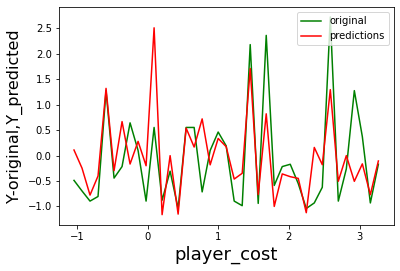

In [53]:
x = np.linspace(-1.04087012, 3.266556, 39)
y1 = np.asarray(y_test)
y2=np.asarray(y_pred_lr1)
plt.plot(x, y1,'g')
plt.plot(x,y2,'r')
plt.legend(['original','predictions'])
plt.xlabel('player_cost', fontsize=18)
plt.ylabel('Y-original,Y_predicted', fontsize=16)
plt.show()